# <left> <font color='#de072e'>I- Preprocessing</font> </left> 

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [49]:
col_names = ['User_name','Tweets_text', 'Source']
tweets_df = pd.read_csv('data_tweets.csv', header=None, names=col_names)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16936 entries, 0 to 16935
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    16936 non-null  object
 1   Tweets_text  16936 non-null  object
 2   Source       16904 non-null  object
dtypes: object(3)
memory usage: 397.1+ KB


In [50]:
tweets_df[tweets_df['Tweets_text'].duplicated(keep=False)].sort_values('Tweets_text').head(8)

,User_name,Tweets_text,Source
15561,MacaesBruno,805 Covid deaths in Germany today. Now well ab...,"<a href=""http://twitter.com/#!/download/ipad"" ..."
16434,BrunoBotMacaes,805 Covid deaths in Germany today. Now well ab...,"<a href=""http://www.changeitlater.com"" rel=""no..."
12009,KCchemguy,Agreed,"<a href=""http://twitter.com/download/iphone"" r..."
3454,DingDon47296742,Agreed,"<a href=""http://twitter.com/download/iphone"" r..."
3223,ianrobo1,Been catching up on this ... Esther was great,"<a href=""http://twitter.com/download/iphone"" r..."
8042,ianrobo1,Been catching up on this ... Esther was great,"<a href=""https://about.twitter.com/products/tw..."
8674,deahuq1,Check out my Gig on Fiverr: do black and white...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
12097,deahuq1,Check out my Gig on Fiverr: do black and white...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."


In [51]:
tweets_df = tweets_df.drop_duplicates('Tweets_text')
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10558 entries, 0 to 16934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    10558 non-null  object
 1   Tweets_text  10558 non-null  object
 2   Source       10530 non-null  object
dtypes: object(3)
memory usage: 329.9+ KB


==> as we can see in our dataFrame there is rows that has null value so we need first to dispose these rows so that we can work on equal rows/columns

In [52]:
#First replace all the empty rows with NAN value 
tweets_df['Source'].replace('', np.nan, inplace=True)
#Then we drop those rows
tweets_df.dropna(subset=['Source'], inplace=True)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 16934
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    10530 non-null  object
 1   Tweets_text  10530 non-null  object
 2   Source       10530 non-null  object
dtypes: object(3)
memory usage: 329.1+ KB


In [53]:
tweets_df.head()

,User_name,Tweets_text,Source
0,sectest9,RT @Arcserve: 2020 saw rampant #cyberattacks o...,"<a href=""https://ho.com"" rel=""nofollow"">auto i..."
1,pizza_czar,RT @TMZ: Viral 'Dreams' Skateboarder Nathan Ap...,"<a href=""http://twitter.com/download/iphone"" r..."
2,stubbysquid,Ok so I just talked to my doctor and because a...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,MikePShanahan,What he means to say: ‘ COVID part one went re...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,jennicat777,RT @drdavidsamadi: I feel like I’ve been repea...,"<a href=""http://twitter.com/download/android"" ..."


## <left> <font color='#60a86d'>1- Tweets Cleaning</font> </left> 

In [54]:
# Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+',  '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

# Clean the tweets
tweets_df['Tweets_text'] = tweets_df['Tweets_text'].apply(cleanTxt)
tweets_df['Tweets_text'] = tweets_df['Tweets_text'].apply(deEmojify)

# Show the cleaned tweets
tweets_df.head(10)

,User_name,Tweets_text,Source
0,sectest9,2020 saw rampant cyberattacks on US hospitals...,"<a href=""https://ho.com"" rel=""nofollow"">auto i..."
1,pizza_czar,Viral Dreams Skateboarder Nathan Apodaca Tes...,"<a href=""http://twitter.com/download/iphone"" r..."
2,stubbysquid,Ok so I just talked to my doctor and because a...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
3,MikePShanahan,What he means to say COVID part one went re...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
4,jennicat777,I feel like I ve been repeating myself quite a...,"<a href=""http://twitter.com/download/android"" ..."
5,the_real_tsnutz,Mitch McConnell and Republicans want to block ...,"<a href=""http://twitter.com/download/iphone"" r..."
7,MsActiviss,Memorable Trump Lies Inject disinfectant for...,"<a href=""http://twitter.com/download/android"" ..."
8,order_personal,CDC Reveals Hospitals Counted 130 000 Heart At...,"<a href=""https://mobile.twitter.com"" rel=""nofo..."
9,PRKramer1,Ohio State Faithful Not Happy With Michigan Fo...,"<a href=""http://twitter.com/download/android"" ..."
10,EcoHubb,Concentrations of methane surged by a near rec...,"<a href=""http://twitter.com/download/android"" ..."


In [55]:
#Create a new csv file with the cleande tweets
tweets_df = tweets_df.set_index('Tweets_text') 
tweets_df.to_csv('clean_txeets_text.csv')

In [56]:
df = pd.read_csv('clean_txeets_text.csv')
#First replace all the empty rows with NAN value 
df['Tweets_text'].replace('', np.nan, inplace=True)
#Then we drop those rows
df.dropna(subset=['Tweets_text'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10529 entries, 0 to 10529
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweets_text  10529 non-null  object
 1   User_name    10529 non-null  object
 2   Source       10529 non-null  object
dtypes: object(3)
memory usage: 329.0+ KB


## <left> <font color='#60a86d'>2- Natural language processing (NLP)</font> </left> 

In [57]:
#important libraries for preprocessing using NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer


[nltk_data] Downloading package wordnet to /home/oumaima/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/oumaima/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/oumaima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [58]:
def preprocess_data(data):
    #Removes Numbers
    data = data.astype(str).str.replace('\d+', '')
    lower_text = data.str.lower()
    lemmatizer = nltk.stem.WordNetLemmatizer()
    w_tokenizer =  TweetTokenizer()
    def lemmatize_text(text):
        return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]
    def remove_punctuation(words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', (word))
            if new_word != '':
                new_words.append(new_word)
        return new_words
    words = lower_text.apply(lemmatize_text)
    words = words.apply(remove_punctuation)
    return pd.DataFrame(words)

pre_tweets = preprocess_data(df['Tweets_text'])
df['text'] = pre_tweets
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10529 entries, 0 to 10529
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tweets_text  10529 non-null  object
 1   User_name    10529 non-null  object
 2   Source       10529 non-null  object
 3   text         10529 non-null  object
dtypes: object(4)
memory usage: 411.3+ KB


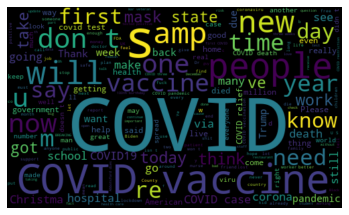

In [60]:
from wordcloud import WordCloud
#WordCloud visualization
allWords = ' '.join([twts for twts in df['Tweets_text']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# <left> <font color='#de072e'>II-Tweets Classification</font> </left> 

## <left> <font color='#60a86d'>1- Word2Vec</font> </left> 

In [61]:
from gensim.models import Word2Vec
sentences = df['text']
model = Word2Vec(sentences, min_count=1)

In [62]:
print (list(model.wv.vocab))
print (len(list(model.wv.vocab)))

['saw', 'rampant', 'cyberattacks', 'u', 'hospital', 'healthcare', 'provider', 'continue', 'arcserve', 'sam', 'roguine', 'pr', 'viral', 'dream', 'skateboarder', 'nathan', 'apodaca', 'test', 'positive', 'covid', 'ok', 'talked', 'doctor', 'friend', 'sent', 'link', 'taking', 'ivermectin', 'anaphylaxis', 'mean', 'say', 'part', 'one', 'went', 'really', 'well', 'many', 'took', 'without', 'even', 'questioning', 'feel', 'like', 'repeating', 'quite', 'bit', 'still', 'message', 'understood', 'lockdown', 'c', 'mitch', 'mcconnell', 'republican', 'want', 'block', 'dol', 'state', 'osha', 'able', 'hold', 'employer', 'accountab', 'memorable', 'trump', 'lie', 'inject', 'disinfectant', 'another', 'hoax', 'inauguration', 'crowd', 'size', 'cdc', 'reveals', 'counted', 'heart', 'attack', 'flu', 'bacterial', 'pneumonia', 'death', 'ohio', 'faithful', 'happy', 'michigan', 'football', 'concentration', 'methane', 'surged', 'near', 'record', 'rate', 'last', 'year', 'per', 'billion', 'level', 'higher', 'truly', 'si

In [63]:
X = model[model.wv.vocab]

/home/oumaima/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


Fit 3 clusters
Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters
Fit 21 clusters
Fit 23 clusters
Fit 25 clusters
Fit 27 clusters
Fit 29 clusters


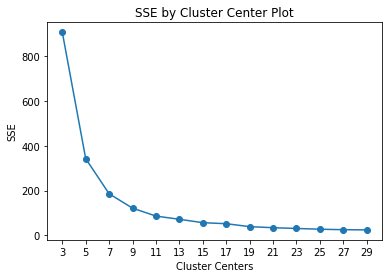

In [88]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
#Finding Optimal Clusters
sse = []
def find_optimal_clusters(data, max_k):
    iters = range(3, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
find_optimal_clusters(X, 30)

In [ ]:
from kneed import KneeLocator
kl = KneeLocator(range(3, 30), sse, curve="convex", direction="decreasing")
kl.elbow

In [37]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=7
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)

[6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 3, 3, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 2, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 4, 3, 5, 6, 6, 6, 6, 3, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 1, 6, 4, 6, 6, 6, 6, 

In [38]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

saw:6
rampant:6
cyberattacks:4
u:6
hospital:6
healthcare:6
provider:6
continue:6
arcserve:6
sam:6
roguine:5
pr:6
viral:6
dream:6
skateboarder:6
nathan:6
apodaca:6
test:6
positive:6
covid:6
ok:6
talked:6
doctor:6
friend:6
sent:6
link:6
taking:6
ivermectin:6
anaphylaxis:6
mean:6
say:6
part:6
one:6
went:6
really:6
well:6
many:6
took:6
without:6
even:6
questioning:6
feel:6
like:6
repeating:5
quite:6
bit:6
still:6
message:6
understood:4
lockdown:6
c:6
mitch:6
mcconnell:6
republican:6
want:6
block:6
dol:3
state:6
osha:6
able:6
hold:6
employer:6
accountab:3
memorable:3
trump:6
lie:6
inject:6
disinfectant:2
another:6
hoax:6
inauguration:6
crowd:6
size:6
cdc:6
reveals:6
counted:6
heart:6
attack:6
flu:6
bacterial:6
pneumonia:6
death:6
ohio:6
faithful:5
happy:6
michigan:6
football:6
concentration:6
methane:2
surged:3
near:6
record:6
rate:6
last:6
year:6
per:6
billion:6
level:6
higher:6
truly:6
sick:6
seeing:6
stuff:6
mass:6
transit:6
safe:6
eating:6
restaurant:6
lol:6
okay:6
today:6
bombshell:6
u

clair:3
english:6
teamstclair:2
eaten:6
taco:6
mexico:6
yo:6
wearamask:6
solidarity:6
nursestrong:6
cotonavirus:5
truck:6
street:6
assumed:6
allergy:6
drug:6
nobe:4
agrees:6
girlfriend:6
revealing:5
showing:6
sweeping:6
coca:6
cola:6
papaya:6
reliable:6
raven:6
placed:6
qb:6
mcsorley:6
injured:6
knee:6
sprain:6
al:6
answered:6
poor:6
journalist:6
defundthemedia:6
smell:6
conman:2
intelligence:6
ratcliffe:0
asserts:0
chinese:6
communist:6
rightly:6
decided:6
taught:6
threatening:6
forever:6
freedom:6
unless:6
several:6
coordinating:6
closely:4
others:6
geographic:6
vicinity:2
coalitio:4
name:6
cbc:6
attribution:4
reference:2
overwhelmed:6
overblown:6
ample:2
capacity:6
nationwide:6
retroactive:6
immunity:6
corporation:6
lawsuit:6
dollar:6
hype:6
merit:6
prophylactic:4
gotta:6
something:6
nigga:6
theater:6
tyrant:6
cannot:6
passing:6
heavy:6
snow:6
accumulation:6
wind:6
gusting:6
mph:4
medicaid:6
reimburse:6
rider:6
horrified:6
large:6
rat:6
subway:6
bear:6
mind:6
considered:5
fair:6
blu

star:6
nra:6
lobbyist:6
arrogance:6
soaring:6
murmur:3
wanting:6
rem:6
circling:2
inc:6
mfers:6
til:6
cmbx:3
bpy:3
spg:5
psyche:6
communitie:5
symptomatic:5
compared:6
hostel:4
treasure:3
spotted:2
bragging:5
keir:5
starmer:6
relaxation:6
axed:5
superspreader:6
barron:4
posted:6
tiktok:6
belongs:6
gulag:6
shy:6
ironic:5
urgent:6
richard:6
fleming:6
vaxx:6
gate:6
constantly:6
invited:6
mu:6
exact:6
worthreading:4
herd:6
completely:6
prot:6
asian:6
extensive:6
randomized:6
controlled:6
rct:6
meta:4
review:6
specifically:6
rolled:6
lea:6
hubris:6
furthermore:6
ltcs:6
alcohol:6
sanitizer:3
othe:2
tae:5
pharmacist:6
taki:5
motherfucker:6
schoolers:6
congenital:2
paper:6
ed:6
initial:6
apprehension:6
cl:6
hears:6
ir:6
dippin:3
dot:6
teach:5
shakespeare:5
shaped:0
delicious:5
strep:6
apathy:6
example:6
infrastructure:6
regional:6
semi:5
causing:6
networ:5
commie:6
justin:6
trudeau:6
pedophilia:6
defamation:6
academic:6
fallout:6
quoting:6
propa:2
posi:6
overwhelmingly:6
reliant:4
viewing:6
la

individ:4
comforting:3
stroll:3
desert:5
attends:6
cultural:6
airplan:1
reply:6
sexually:6
assa:6
hatter:4
eleven:5
nmc:4
numerous:6
outta:3
pilot:6
icosapent:6
ethyl:6
vascepa:6
reduc:5
versa:6
solving:4
challe:6
vaughan:6
genthing:6
advesre:3
eyebrow:2
lookin:5
anticipated:3
uihc:6
stream:6
clancy:6
siege:6
greengamer:6
headed:6
dinsdale:5
outdoors:6
owned:6
reaction:6
strategy:6
talki:2
jealous:3
embarrassing:6
confession:5
kayleigh:5
harvard:2
guelph:2
writ:4
fortunate:2
destruction:3
asthma:5
selfowned:2
longterm:5
lib:5
reed:6
thee:6
shrub:4
kc:6
unwillingness:5
adherence:4
ima:6
ludowici:5
recomm:4
onset:3
authoritarian:6
serology:2
principal:6
mvskoke:6
creek:6
rur:5
unaccompanied:5
referral:6
manipulate:0
possibl:3
sinister:2
scorpionic:3
finster:1
helllllllll:1
plese:6
cracker:3
option:6
archaeology:2
regulator:6
mhra:6
attenuated:4
absolute:6
lingering:6
aftereffect:5
saharan:6
iq:6
exclusively:4
daysc:4
drunken:6
disingenuous:6
snitching:0
hack:3
orangemanbad:6
reversed:6
g

alito:4
flushed:6
montgomery:6
torturing:5
bozo:5
clip:5
immunoluminescent:4
assay:4
svr:3
spy:6
kgb:6
cozy:6
phish:6
defau:4
assemblyman:6
gary:6
finch:6
pneum:6
cit:3
camden:6
huuge:5
clamp:5
diffic:4
talented:6
hourly:6
earnings:4
uae:5
bahrain:6
saudi:6
arabia:6
bono:1
relieved:2
kirsty:2
allsopp:6
dirt:6
whic:6
marshal:3
woolly:1
stanford:6
ioannidis:6
fiasco:2
compassion:4
boudoir:6
apparent:6
dawn:2
butler:6
announc:5
muni:3
ate:5
kfc:6
promoted:6
astraz:5
immunizers:5
racking:5
pennsylvania:6
irs:6
wembley:4
stadium:3
ukraine:6
opponent:6
kentuckian:2
encouragement:2
cranberry:6
juice:6
scroll:4
editor:5
noticeable:6
mutiny:5
clueless:6
bumble:5
unpopular:6
nabil:3
antimask:2
coworker:6
rafael:6
behr:3
twinge:3
guilt:2
transmit:6
phony:6
pcrs:5
subvert:3
discovery:6
vacationing:5
basi:3
ndasiya:3
dildo:3
fag:6
ranger:6
agc:6
constructing:6
ltc:6
extension:6
forgiveness:2
depressed:4
taoseach:3
risking:6
irish:6
su:3
dumbass:6
pivotal:5
intentionally:3
befor:6
ambani:4
adani:3
v

dependent:0
shmuk:3
seeker:6
afaik:4
xd:6
fearmongers:3
pelas:3
suuuuuuper:4
clot:6
fucken:4
concerning:6
luis:6
wad:2
embass:4
pary:5
slapped:4
troyanna:2
hamm:2
congratulate:2
performer:4
throe:3
footing:3
marik:6
irrefutable:6
inflammato:2
statista:2
elated:1
kudos:2
hometown:6
understatement:6
planner:6
informal:3
booster:5
slight:6
rotchild:3
comme:4
hasard:2
mak:3
indicate:6
cannabis:6
derived:6
cannabinoids:6
immuno:6
leaked:2
rcpjournalclub:2
amateur:2
dealt:6
strength:6
colt:5
ironically:2
peddled:6
denies:6
accusation:6
frightening:2
invented:2
singl:5
retrospect:4
proportion:4
mee:4
blimey:6
realise:6
darlington:2
decor:6
sudhir:6
kumar:6
indian:6
wide:6
rang:3
lecturing:6
aide:6
hardest:6
chegamos:6
ponto:6
sem:6
volta:6
hitchens:6
vindicate:5
corny:6
prompting:6
grounded:1
wedn:5
parenthood:2
unborn:2
tracked:6
wire:2
practicesafeix:5
wth:2
deepfake:6
lone:6
motion:6
overreach:6
stated:6
perpetraitors:5
heathy:6
proteomics:3
battlefield:3
wileyproteomics:3
massspecpub:3
dr

shotgun:5
katrina:4
vio:4
immunized:3
wethepeople:4
stopthesteai:6
saveamerica:6
patriotsunite:6
rosen:3
spc:6
commended:4
adnoc:3
consistently:3
proprietor:6
wcco:4
proper:5
ratty:4
pizza:6
hut:6
unsurprising:4
revisiting:2
fem:6
avery:5
delacey:6
immunocompromised:4
depot:0
geh:3
lotta:6
delive:2
slavery:5
wearable:6
overview:5
governan:6
homeopathy:5
practitioner:2
brunch:6
eatery:2
schmovid:4
bera:3
sencos:3
participa:6
jennings:4
kung:5
forego:4
pneumo:4
agreeing:6
horrifying:0
psychologist:6
christmasbubble:2
bursting:1
chasing:2
feedin:6
sus:1
diversifying:6
talent:6
righ:4
mingling:4
privately:6
neville:6
shall:4
grave:4
penis:2
weigh:4
bp:4
folsom:0
subject:6
coordinated:5
misinformat:6
emsa:6
darren:4
creep:4
soy:6
neglig:2
payout:5
janke:2
sucked:4
fetus:2
ryanwinkler:2
walz:2
infects:5
fallen:2
seemed:4
beard:6
wig:6
cheapo:6
venice:6
sunglass:6
afro:6
colombian:6
massacred:3
lending:3
vertical:4
pictured:5
conveying:6
fridge:6
responsibl:2
mediterranean:3
adopt:5
enhance:5

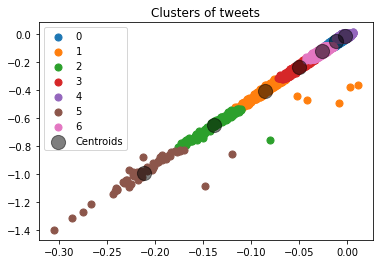

In [39]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
label = kmeans.labels_
#Getting unique labels
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] ,label = i, s=50, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],label='Centroids',c='black', s=200, alpha=0.5);
plt.title('Clusters of tweets')
plt.legend()
plt.show()

In [41]:
print ("Cluster id labels for inputted data")
print (label)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)


Cluster id labels for inputted data
[6 0 4 ... 4 4 4]
Centroids data
[[-1.17811803e-02 -5.48411198e-02  1.80735607e-02 -1.48862181e-02
  -4.93016243e-02  5.23651205e-02 -1.86111350e-02 -2.73659192e-02
   1.88910067e-02 -4.78923284e-02  3.37602310e-02 -1.97422244e-02
  -1.93683263e-02  5.03884964e-02 -3.20457779e-02  1.15715852e-02
   6.22945232e-03 -4.01096679e-02  6.15397692e-02  6.58407295e-03
   2.83434731e-03  1.83996055e-02  2.55293902e-02  5.35898423e-03
  -1.97860156e-03 -2.86705643e-02 -4.36402112e-02 -4.00256701e-02
   2.49485783e-02  3.34029458e-02 -5.32009872e-03  9.24292672e-03
   1.58002842e-02  1.72430780e-02  3.81341926e-03 -1.84717923e-02
  -7.69432774e-03 -2.01369449e-02  1.81488767e-02  8.38762801e-03
   9.12390742e-03  1.90149862e-02  6.60824478e-02  4.79035117e-02
   1.74174551e-02 -1.24992067e-02  5.15514649e-02  1.75756365e-02
  -1.98020488e-02 -6.33211806e-03 -8.33976548e-03 -2.39680782e-02
   3.99217941e-02  7.27953315e-02 -6.08569197e-03  1.90804377e-02
  -5.72

NameError: name 'labels' is not defined

## <left> <font color='#60a86d'>2- Cosine Similarity</font> </left> 

In [18]:
from sklearn.feature_extraction.text import *
from sklearn.preprocessing import normalize
tv_vec=TfidfVectorizer()
tfidf_tweets =tv_vec.fit_transform(df.Tweets_text)
word_features = tv_vec.get_feature_names()
tf_idf_norm = normalize(tfidf_tweets)
tf_idf_array = tf_idf_norm.toarray()
#pd.DataFrame(data = tf_idf_array, columns=word_features)

Fit 3 clusters
Fit 5 clusters
Fit 7 clusters
Fit 9 clusters
Fit 11 clusters
Fit 13 clusters
Fit 15 clusters
Fit 17 clusters
Fit 19 clusters
Fit 21 clusters
Fit 23 clusters
Fit 25 clusters
Fit 27 clusters
Fit 29 clusters


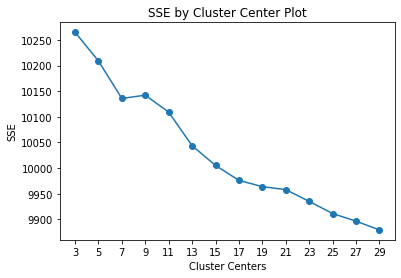

In [19]:
from sklearn.cluster import KMeans
#Finding Optimal Clusters
def find_optimal_clusters(data, max_k):
    iters = range(3, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tf_idf_array, 30)

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 23, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(tfidf_tweets)
# We look at the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(word_features[word] for word in centroid))

/home/oumaima/Downloads/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


0 : covid, for, and, in, the, it, with, of, that, on, has, no, are, me, amp, good, at, all, what, by, up, so, have, please, to
1 : the, of, in, covid, and, 19, to, for, on, has, pandemic, that, are, trump, is, about, by, with, at, it, one, this, spread, have, world
2 : from, covid, the, to, 19, of, have, and, died, for, in, that, 000, their, americans, is, has, on, with, you, it, during, sign, uk, who
3 : he, his, the, covid, to, is, in, and, has, of, it, had, that, but, on, didn, if, with, him, just, was, for, think, got, trump
4 : you, if, the, covid, your, to, have, do, for, what, are, don, and, re, thank, about, it, in, vaccine, know, of, think, worry, ve, or
5 : they, the, to, and, it, have, covid, are, re, for, that, of, if, in, is, don, but, just, their, so, all, can, because, do, not
6 : vaccine, 19, the, covid, first, to, in, of, pfizer, receive, moderna, for, get, doses, workers, on, shipment, and, is, health, at, fda, received, administered, healthcare
7 : was, the, covid, t

CPU times: user 3.17 s, sys: 843 ms, total: 4.02 s
Wall time: 1.16 s


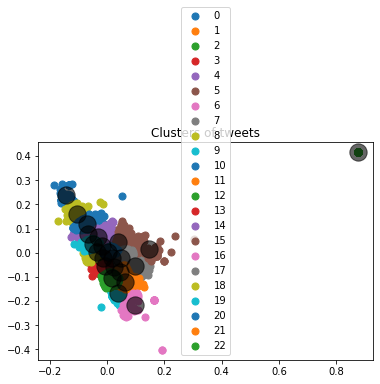

In [23]:
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
n_clusters = 23
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters= n_clusters, max_iter=600, algorithm = 'auto')
%time fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)
label = kmeans.labels_
#Getting unique labels
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(Y_sklearn[label == i , 0] , Y_sklearn[label == i , 1] ,label = i, s=50, cmap='viridis')
centers2 = fitted.cluster_centers_
plt.scatter(centers2[:, 0], centers2[:, 1],c='black', s=300, alpha=0.6);
plt.title('Clusters of tweets')
plt.legend()
plt.show()



/home/oumaima/.local/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


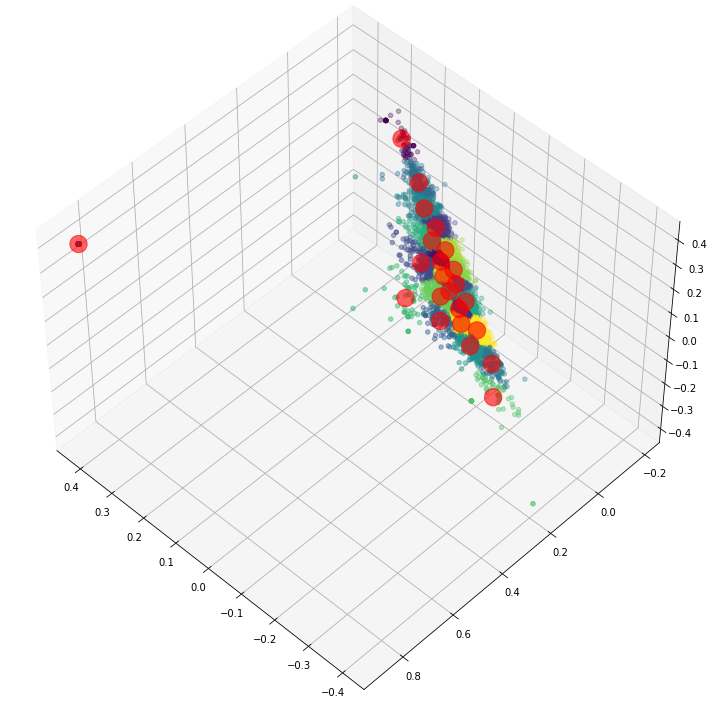

In [36]:
from mpl_toolkits.mplot3d import Axes3D
sklearn_pca = PCA(n_components = 3)
fignum = 1
fig = plt.figure(fignum, figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(Y_sklearn[:, 1], Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction)
centers2 = fitted.cluster_centers_
ax.scatter(centers2[:, 1], centers2[:, 0],centers2[:, 1],c='red', s=300, alpha=0.6);
ax.dist = 10
fig.show()